## Вариант 15. Касьянов Семен

Решить систему обыкновенных дифференциальных уравнений на отрезке $[0,5]$ явным методом 4 порядка по таблице Бутчера и сравнить со стандартным методом Рунге Кутты 4 порядка и явным методом Эйлера.

$$
\begin{cases}
y_{1}^{'}\,=\,y_2 \\
\\
y_2^{'}\,=\,-2 y_1^2\left(1-4 t^2 y_1\right)
\end{cases}
\\
$$

$$
\begin{array}{l|llll}
0 & & & & \\
1 / 3 & 1/3 & & & \\
2 / 3 & -1 /3 & 1 & & \\
1 & 1 & -1 & 1 \\
\hline & 1 / 8 & 3 / 8 & 3 / 8 & 1 / 8
\end{array}
$$

Проверить точное решение $y_1=\frac{1}{1+t^2}, y_2=\frac{-2 t}{\left(1+t^2\right)^2}$. Выбрать оптимальный шаг интегрирования по правилу Рунге для достижения точности $10^{-5}$ и построить графики траектории решения и погрешности $\varepsilon(t)$. Для каждого метода построить зависимость максимальной погрешности решения от шага расчёта $\varepsilon(h)$ и аппроксимировать её ןстепенной функцией (подобрать значение степени).

$y_1(0)\,=\,1,\,y_2(0)\,=\,0\,,\,y_1^{'}(0)\,=\,0,\,y_2^{'}(0)\,=\,-2$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Функция, возвращающая массив точек разбиения заданного отрезка
def point(n):

    a = np.linspace(0, 5, n)
    return a

Для начальных вычислений будем разбивать наш отрезок на 2560001 точку

## Явный метод Эйлера

Используем следующую формулу:
$$
\cfrac{u_{n+1}\,-\,u_n}{\tau}\,=\,f(t_n,\,u_n)
$$

In [3]:
points = point(2560001)
y1 = [1] # Здесь сохраняем значения y1
y2 = [0] # Здесь сохраняем значения y2
tau = points[1] - points[0]

# Вычисляем значения y1 и y2 в каждой t_n
for i in points[:-1]:
    y_1 = y1[-1]
    y_2 = y2[-1]
    newy_1 = y_1 + tau * y_2
    newy_2 = y_2 + tau * ((-2) * (y_1**2) * (1 - 4 * (i**2) * y_1))
    y1.append(newy_1)
    y2.append(newy_2)


In [4]:
# Считаем ошибку в каждой точке
eps = []
for i in range(len(points)):
    eps1 = 1/(1 + points[i]**2) - y1[i]
    eps2 = (-2 * points[i])/(1 + points[i]**2)**2 - y2[i]
    eps.append(np.sqrt(eps1**2 + eps2**2))

Построим точное решение и то, что было получено с помощью явного метода Эйлера, в осях y_1  y_2

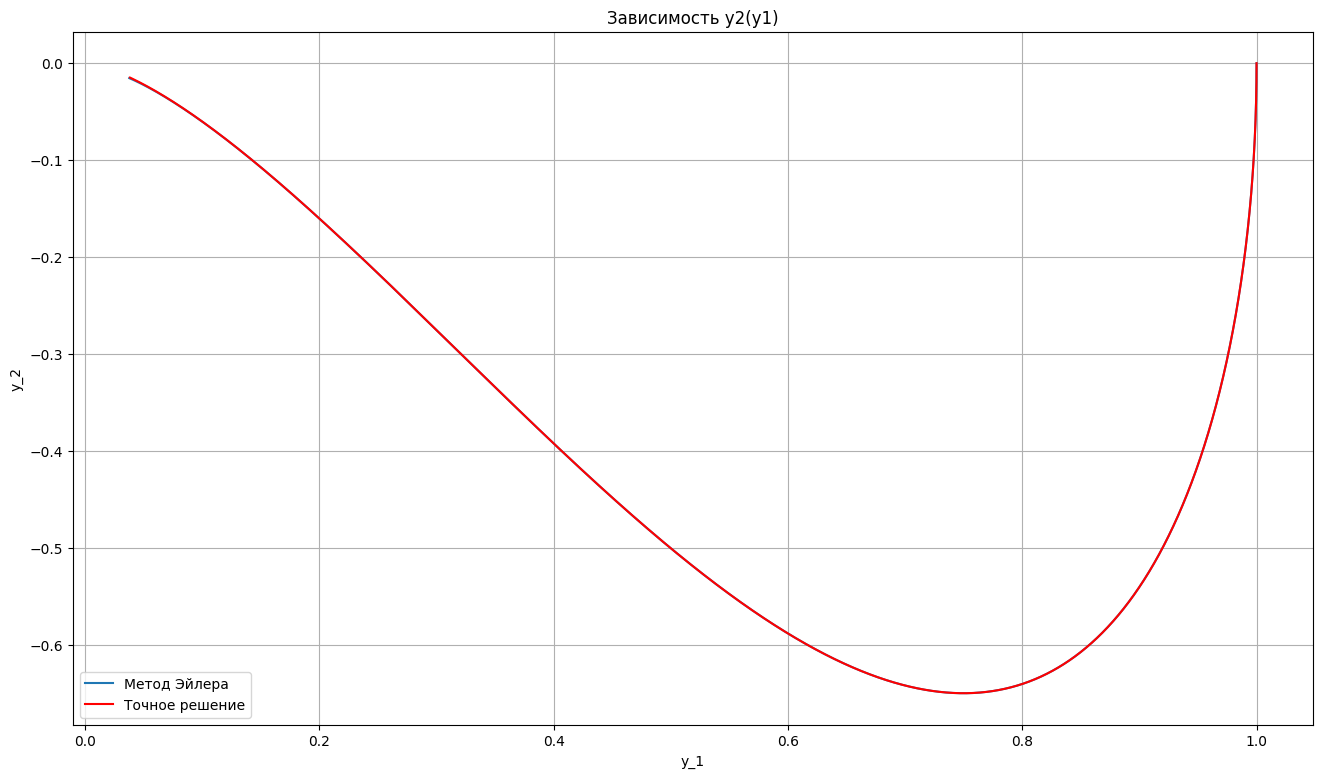

In [5]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(y1, y2, label = 'Метод Эйлера')
plt.xlabel('y_1')
plt.ylabel('y_2')
plt.title('Зависимость y2(y1)')
plt.plot((1)/(1 + points**2), (-2*points)/(1 + points**2)**2, c ='r', label = 'Точное решение')
plt.legend()
plt.show()

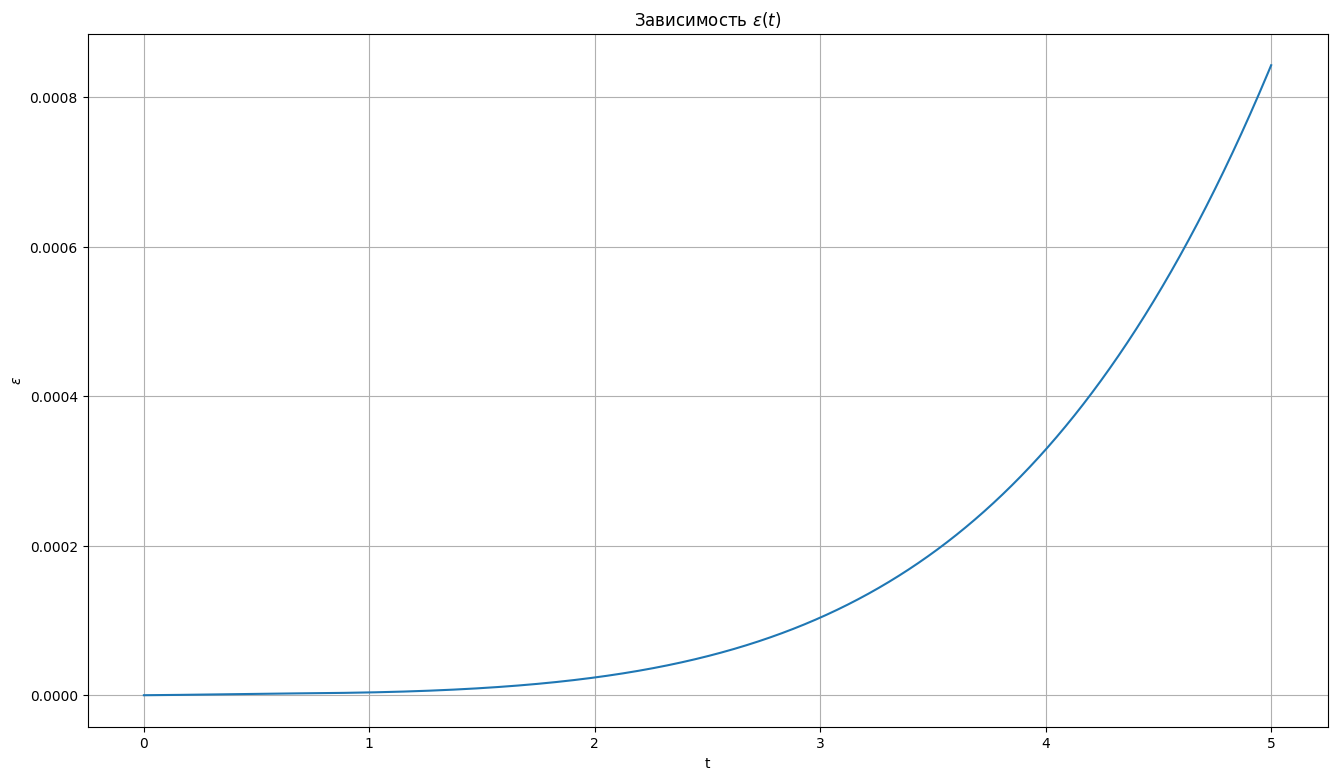

In [6]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(points, eps)
plt.xlabel('t')
plt.ylabel(r'$\varepsilon$')
plt.title(r'Зависимость $\varepsilon (t)$')
plt.show()

## Явный метод 4-го порядка по таблице Бутчера
Для удобства приведём таблицу ещё раз:

$$
\begin{array}{l|llll}
0 & & & & \\
1 / 3 & 1/3 & & & \\
2 / 3 & -1 /3 & 1 & & \\
1 & 1 & -1 & 1 \\
\hline & 1 / 8 & 3 / 8 & 3 / 8 & 1 / 8
\end{array}
$$
\
Используем следующие формулы:
$$
\begin{aligned}
& k_1=f\left(t_n, u_n\right) \\
& k_2=f\left(t_n+c_2 \tau, u_n+\tau a_{21} k_1\right) \\
& k_3=f\left(t_n+c_3 \tau, u_n+\tau a_{31} k_1+\tau a_{32} k_2\right) \\
& k_s=f\left(t_n+c_s \tau, u_n+\tau \sum_{i=1}^{s-1} a_{s i} k_i\right) \\
& u_{n+1}=u_n+\tau \sum_{i=1}^S b_i k_i \\
\end{aligned}
$$

In [7]:
points = point(640001)
y1 = [1] # Здесь сохраняем значения y1
y2 = [0] # Здесь сохраняем значения y2
tau = points[1] - points[0]


for i in points[:-1]:
    # Вычисляем для y1
    k1 = y2[-1]
    k2 = y2[-1] + tau * 1/3 * k1
    k3 = y2[-1] + tau * ((-1 / 3) * k1 + 1 * k2)
    k4 = y2[-1] + tau * (k1 - k2 + k3)

    y_1 = y1[-1] + tau / 8 * (k1 + 3 * k2 + 3 * k3 + k4)

    # Вычисляем для y2
    k1 = -2 * y1[-1]**2 * (1 - 4 * i**2 * y1[-1])
    k2 = -2 * (y1[-1] + tau * 1 / 3 * k1)**2 * (1 - 4 * (i + 1 / 3 * tau)**2 * (y1[-1] + tau * 1 / 3 * k1))
    k3 = -2 * (y1[-1] + tau * (-1 / 3 * k1 + k2))**2 * (1 - 4 * (i + tau * 2 / 3)**2 * (y1[-1] + tau * (-1 / 3 * k1 + k2)))
    k4 = -2 * (y1[-1] + tau * (k1 - k2 + k3))**2 * (1 - 4 * (i + tau)**2 * (y1[-1] + tau * (k1 - k2 + k3)))

    y_2 = y2[-1] + tau / 8 * (k1 + 3 * k2 + 3 * k3 + k4)

    y1.append(y_1)
    y2.append(y_2)

In [8]:
# Считаем ошибку в каждой точке
eps = []
for i in range(len(points)):
    eps1 = 1/(1 + points[i]**2) - y1[i]
    eps2 = (-2 * points[i])/(1 + points[i]**2)**2 - y2[i]
    eps.append(np.sqrt(eps1**2 + eps2**2))

Построим точное решение и то, что было получено с помощью метода 4-го порядка по таблице Бутчера, в осях y_1  y_2

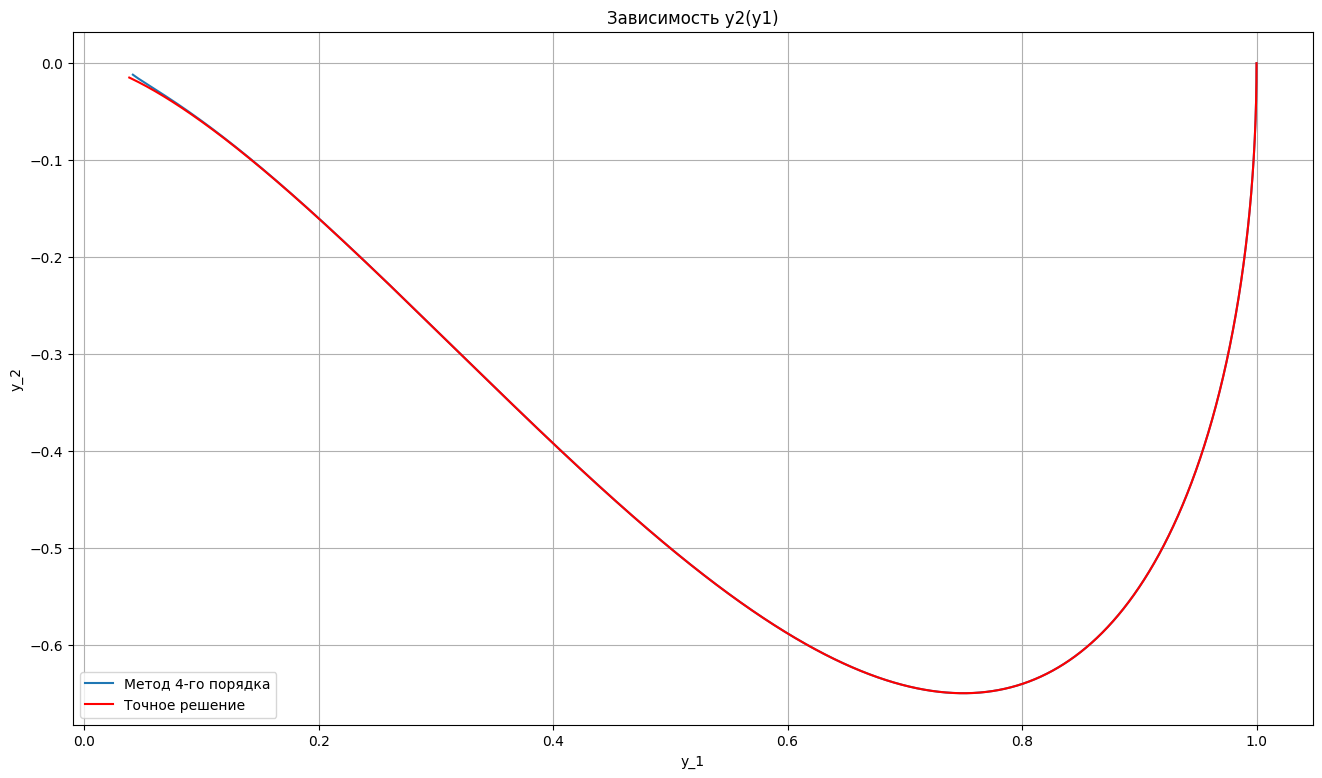

In [9]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(y1, y2, label = 'Метод 4-го порядка')
plt.xlabel('y_1')
plt.ylabel('y_2')
plt.title('Зависимость y2(y1)')
plt.plot((1)/(1 + points**2), (-2*points)/(1 + points**2)**2, c ='r', label = 'Точное решение')
plt.legend()
plt.show()

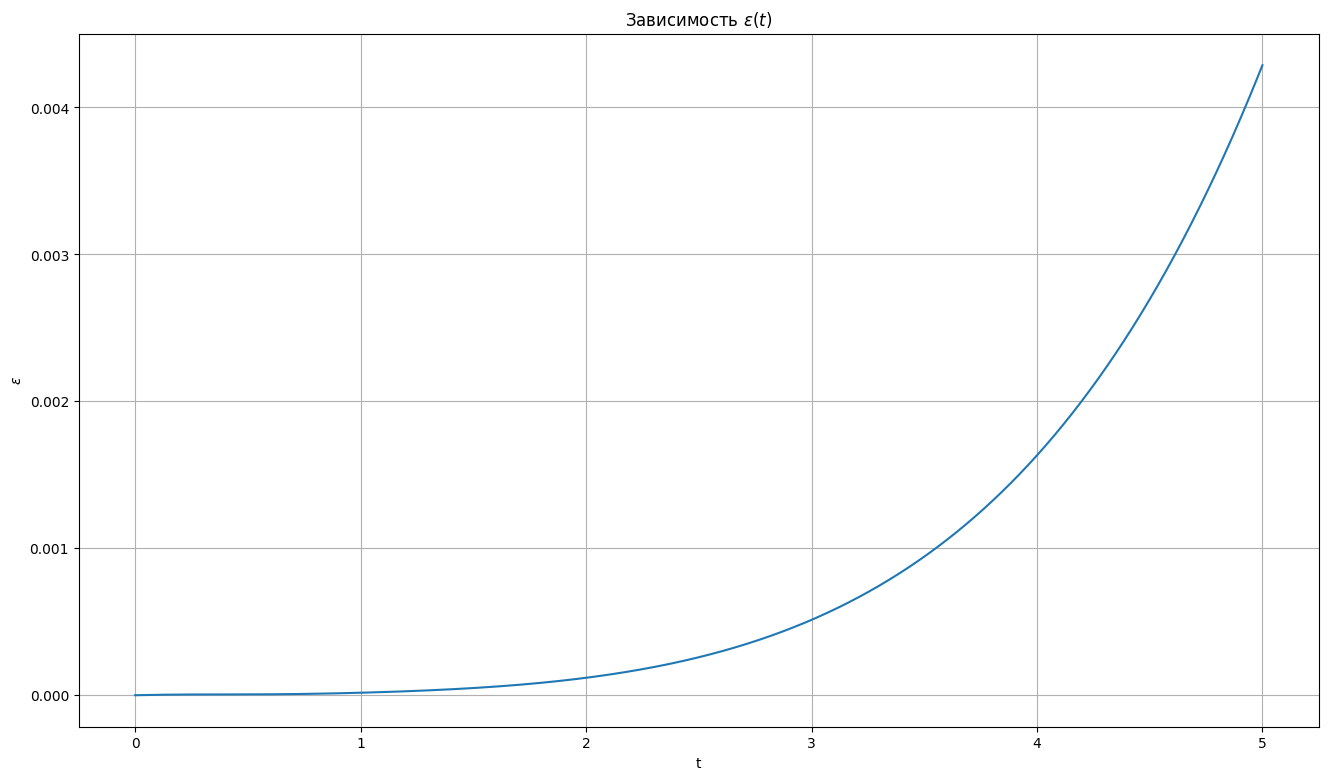

In [10]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(points, eps)
plt.xlabel('t')
plt.ylabel(r'$\varepsilon$')
plt.title(r'Зависимость $\varepsilon (t)$')
plt.show()

## Стандартный метод Рунге-Кутты 4-го порядка

Данному методу соотвествует следующая таблица Бутчера:

$$
\begin{array}{l|llll}
0 & & & & \\
1 / 2 & 1 / 2 & & & \\
1 / 2 & & 1 / 2 & & \\
1 & & & 1 \\
\hline & 1 / 6 & 1 / 3 & 1 / 3 & 1 / 6
\end{array}
$$

In [11]:
points = point(640001)
y1 = [1] # Здесь сохраняем значения y1
y2 = [0] # Здесь сохраняем значения y2
tau = points[1] - points[0]

for i in points[:-1]:
    # Вычисляем для y1
    k1 = y2[-1]
    k2 = y2[-1] + tau * 1 / 2 * k1
    k3 = y2[-1] + tau * 1 / 2  * k2
    k4 = y2[-1] + tau * k3

    y_1 = y1[-1] + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    # Вычисляем для y2
    k1 = -2 * y1[-1]**2 * (1 - 4 * i**2 * y1[-1])
    k2 = -2 * (y1[-1] + tau * 1 / 2 * k1)**2 * (1 - 4 * (i + 1 / 2 * tau)**2 * (y1[-1] + tau * 1 / 2 * k1))
    k3 = -2 * (y1[-1] + tau * 1 / 2 * k2)**2 * (1 - 4 * (i + tau * 1 / 2)**2 * (y1[-1] + tau * 1 / 2 * k2))
    k4 = -2 * (y1[-1] + tau * k3)**2 * (1 - 4 * (i + tau)**2 * (y1[-1] + tau * k3))

    y_2 = y2[-1] + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    y1.append(y_1)
    y2.append(y_2)

In [12]:
# Считаем ошибку в каждой точке
eps = []
for i in range(len(points)):
    eps1 = 1/(1 + points[i]**2) - y1[i]
    eps2 = (-2 * points[i])/(1 + points[i]**2)**2 - y2[i]
    eps.append(np.sqrt(eps1**2 + eps2**2))

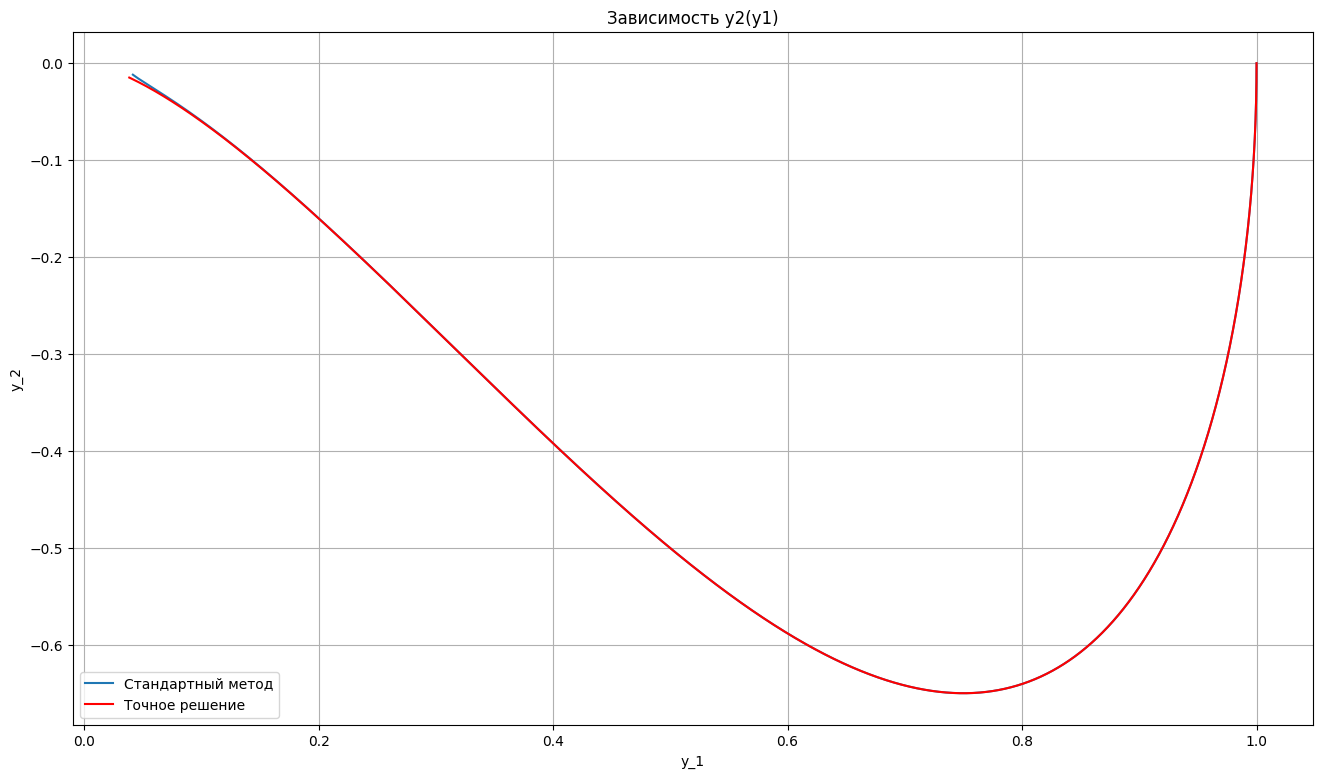

In [13]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(y1, y2, label = 'Стандартный метод')
plt.xlabel('y_1')
plt.ylabel('y_2')
plt.title('Зависимость y2(y1)')
plt.plot((1)/(1 + points**2), (-2*points)/(1 + points**2)**2, c ='r', label = 'Точное решение')
plt.legend()
plt.show()

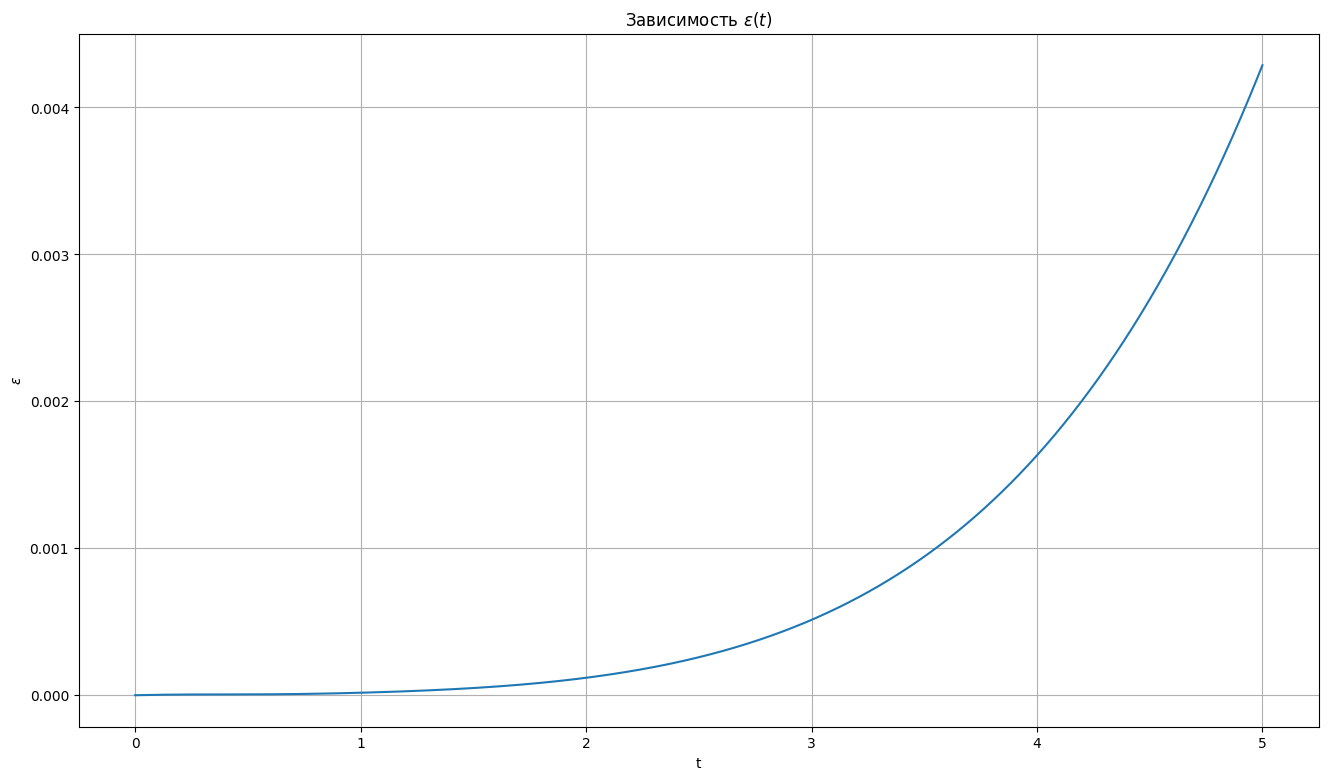

In [14]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(points, eps)
plt.xlabel('t')
plt.ylabel(r'$\varepsilon$')
plt.title(r'Зависимость $\varepsilon (t)$')
plt.show()

Как можно видеть оба метода Рунге-Кутты приводят к неотличимым на глаз решениям системы ДУ, но по таблице Бутчера мы получаем ошибку чуть меньше. В то же самое время метод Эйлера даёт более корректное решение

## Выбор оптимального шага по правилу Рунге

Используем метод с заданной таблицей Бутчера. Также используем следующую формулу:
$$
\left\|u-u^p\left(\frac{\tau}{2}\right)\right\|=\frac{\left\|u^p\left(\frac{\tau}{2}\right)-u^p(\tau)\right\|}{2^p-1},\quad
p = 4
$$


In [15]:
def butcher(n):
    points = point(n + 1)
    y1 = [1] # Здесь сохраняем значения y1
    y2 = [0] # Здесь сохраняем значения y2
    tau = points[1] - points[0]


    for i in points[:-1]:
        # Вычисляем для y1
        k1 = y2[-1]
        k2 = y2[-1] + tau * 1/3 * k1
        k3 = y2[-1] + tau * ((-1 / 3) * k1 + 1 * k2)
        k4 = y2[-1] + tau * (k1 - k2 + k3)

        y_1 = y1[-1] + tau / 8 * (k1 + 3 * k2 + 3 * k3 + k4)

        # Вычисляем для y2
        k1 = -2 * y1[-1]**2 * (1 - 4 * i**2 * y1[-1])
        k2 = -2 * (y1[-1] + tau * 1 / 3 * k1)**2 * (1 - 4 * (i + 1 / 3 * tau)**2 * (y1[-1] + tau * 1 / 3 * k1))
        k3 = -2 * (y1[-1] + tau * (-1 / 3 * k1 + k2))**2 * (1 - 4 * (i + tau * 2 / 3)**2 * (y1[-1] + tau * (-1 / 3 * k1 + k2)))
        k4 = -2 * (y1[-1] + tau * (k1 - k2 + k3))**2 * (1 - 4 * (i + tau)**2 * (y1[-1] + tau * (k1 - k2 + k3)))

        y_2 = y2[-1] + tau / 8 * (k1 + 3 * k2 + 3 * k3 + k4)

        y1.append(y_1)
        y2.append(y_2)
    return y1, y2

In [16]:
n = 40000
y = [] # Здесь сохраняем решения СДУ
error = [1] # Задаю какое-то начальное значение, оно необходимо лишь для того, чтобы цикл начал работать

# Зададим решение на 40000 точек, от него начнём уменьшать разбиение
points = point(n + 1)
y1, y2 = butcher(n)
y.append(np.array(y1 + y2))

while error[-1] > 0.001:

    n *= 2
    points = point(n + 1)
    y1, y2 = butcher(n)
    y.append(np.array(y1 + y2))

    eps = 0
    for i in range (0, len(y[-2]) - 1):
        if eps < abs(y[-1][2*i] - y[-2][i]):
            eps = abs(y[-1][2*i] - y[-2][i]) 
    eps = eps / 15

    error.append(eps)
    print(error[-1])

print(error, n)

0.004420370105413138
0.00125167680277679
0.00048548443346903096
[1, 0.004420370105413138, 0.00125167680277679, 0.00048548443346903096] 320000


Таким образом, при разбиении отрезка на 640000 подотрезков мы имеем ошибку $\approx\,0.0008$, то есть мы достигли требуемого значения $10^{-3}$

## Оптимальное число шагов для Метода Эйлера

## Аппроксимация функции $\varepsilon\,(h)$

In [18]:
def eulero(n):
    points = point(n + 1)
    y1 = [1] # Здесь сохраняем значения y1
    y2 = [0] # Здесь сохраняем значения y2
    tau = points[1] - points[0]

    # Вычисляем значения y1 и y2 в каждой t_n
    for i in points[:-1]:
        y_1 = y1[-1]
        y_2 = y2[-1]
        newy_1 = y_1 + tau * y_2
        newy_2 = y_2 + tau * ((-2) * (y_1**2) * (1 - 4 * (i**2) * y_1))
        y1.append(newy_1)
        y2.append(newy_2)
    return y1, y2

In [19]:
n = 40000
y = [] # Здесь сохраняем решения СДУ
error = [1] # Задаю какое-то начальное значение, оно необходимо лишь для того, чтобы цикл начал работать

# Зададим решение на 40000 точек, от него начнём уменьшать разбиение
points = point(n + 1)
y1, y2 = eulero(n)
y.append(np.array(y1 + y2))

while error[-1] > 0.001:

    n *= 2
    points = point(n + 1)
    y1, y2 = eulero(n)
    y.append(np.array(y1 + y2))

    eps = 0
    for i in range (0, len(y[-2]) - 1):
        if eps < abs(y[-1][2*i] - y[-2][i]):
            eps = abs(y[-1][2*i] - y[-2][i]) 

    error.append(eps)
    print(error[-1])

print(error, n)

0.015115919693875851
0.008523478915131302
0.0045616154407670875
0.002364763672807191
0.001204624577496198
0.0006080388556518393
[1, 0.015115919693875851, 0.008523478915131302, 0.0045616154407670875, 0.002364763672807191, 0.001204624577496198, 0.0006080388556518393] 2560000


Необходимое число шагов - 2650000

Создадим функцию, которая будет осуществлять вычисление по явному методу Эйлера

In [20]:
def eulero(n):
    points = point(n + 1)
    y1 = [1] # Здесь сохраняем значения y1
    y2 = [0] # Здесь сохраняем значения y2
    tau = points[1] - points[0]

    # Вычисляем значения y1 и y2 в каждой t_n
    for i in points[:-1]:
        y_1 = y1[-1]
        y_2 = y2[-1]
        newy_1 = y_1 + tau * y_2
        newy_2 = y_2 + tau * ((-2) * (y_1**2) * (1 - 4 * (i**2) * y_1))
        y1.append(newy_1)
        y2.append(newy_2)
    return y1, y2

In [21]:
h = []
error = []
for i in range (30000, 150000, 1000):
    points = point(i + 1)
    h.append(points[1] - points[0])

    # Зададим массивы точных значений
    realy1 = 1/(1 + points**2)
    realy2 = -2*points/(1 + points**2)**2
    
    y1, y2 = eulero(i)
    eps1 = realy1 - y1
    eps2 = realy2 - y2
    eps = np.sqrt(eps1**2 + eps2**2)
    error.append(max(eps, key = abs))

Произведём аппроксимацию полученных значений с помощью curve_fit. Будем подгонять данные под следующий вид: $y\,=\,a\,x^b$

In [22]:
# Задаём вид функции для аппроксимации
def curve(x, a, b):
    return a * x**b

In [23]:
params, cov = curve_fit(curve, xdata = h, ydata = error)
y = params[0] * h**params[1]
print(f'a = {params[0]}, b = {params[1]}')

a = 76.57161008962301, b = 0.8372924490535851


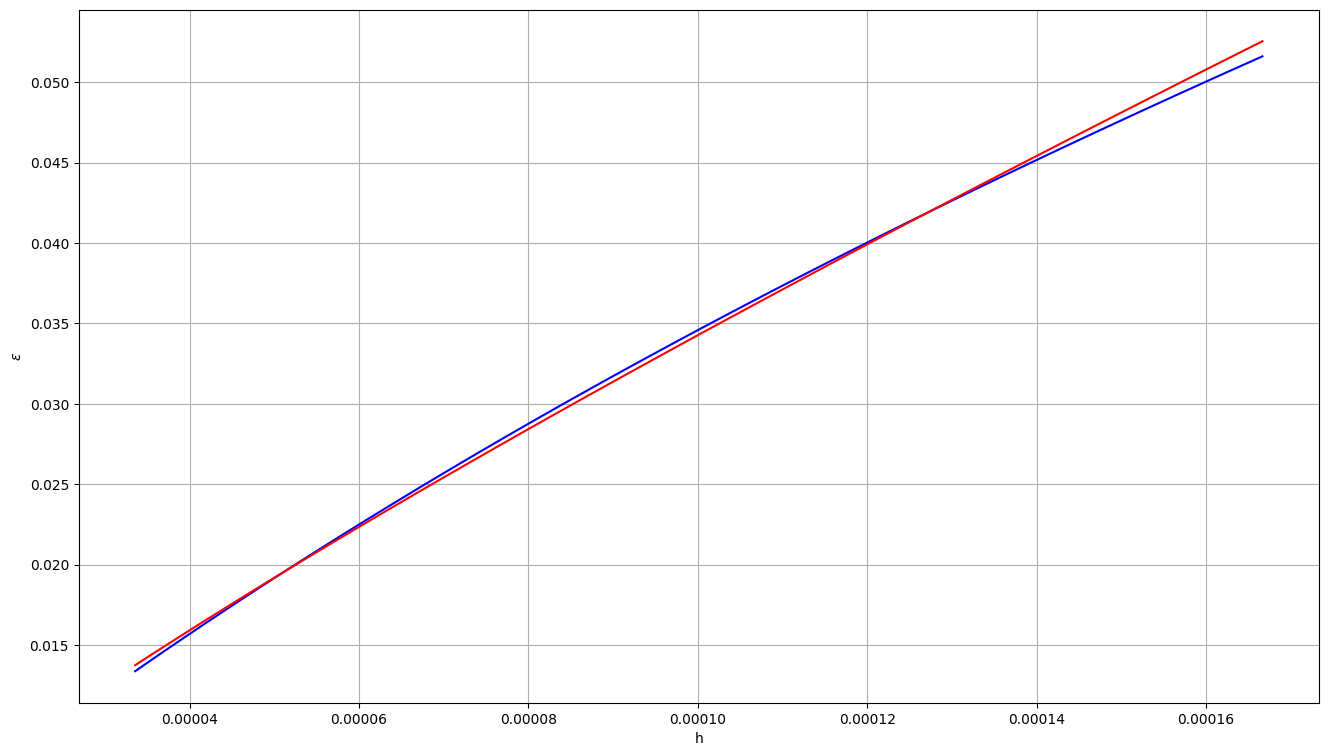

In [24]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(h, error, c = 'b')
plt.plot(h, y, c = 'r')
plt.xlabel('h')
plt.ylabel(r'$\varepsilon$')
plt.show()

##### Явный метод по таблице Бутчера

In [25]:
h = []
error = []
for i in range (40000, 150000, 1000):
    points = point(i + 1)
    h.append(points[1] - points[0])

    # Зададим массивы точных значений
    realy1 = 1/(1 + points**2)
    realy2 = -2*points/(1 + points**2)**2
    
    y1, y2 = butcher(i)
    eps1 = realy1 - y1
    eps2 = realy2 - y2
    eps = np.sqrt(eps1**2 + eps2**2)
    error.append(max(eps, key = abs))

In [26]:
# Задаём вид функции для аппроксимации
def curve(x, a, b):
    return a * np.exp(b * x)

In [27]:
h = np.array(h)
params, cov = curve_fit(curve, xdata = h, ydata = error)
y = params[0] * np.exp(h * params[1])
print(f'a = {params[0]}, b = {params[1]}')

a = 0.013107757010748212, b = 18135.40405249919


Получилось аппроксимировать функцией вида $y\,=\,a\,\exp(b\,x)$

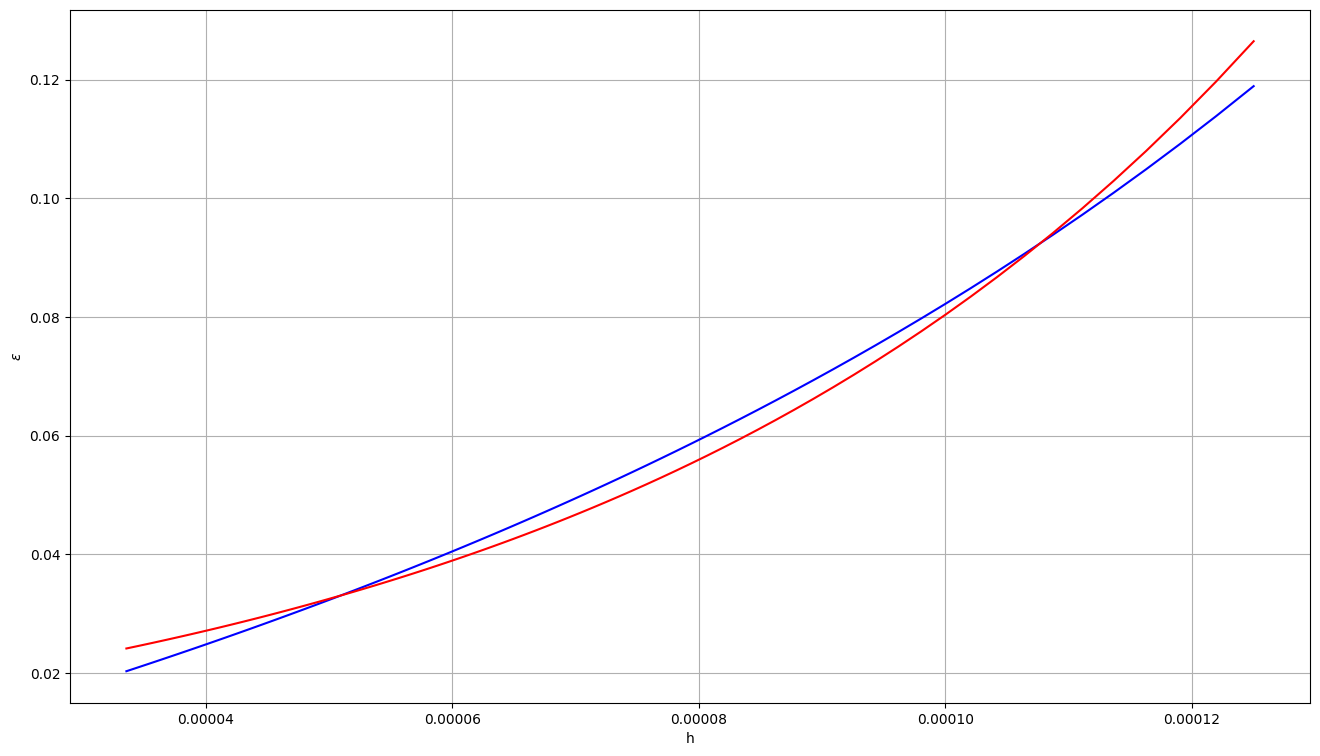

In [28]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(h, error, c = 'b')
plt.plot(h, y, c = 'r')
plt.xlabel('h')
plt.ylabel(r'$\varepsilon$')
plt.show()

##### Стандартный метод Рунге-Кутты

In [29]:
def standard(n):
    points = point(n + 1)
    y1 = [1] # Здесь сохраняем значения y1
    y2 = [0] # Здесь сохраняем значения y2
    tau = points[1] - points[0]

    for i in points[:-1]:
        # Вычисляем для y1
        k1 = y2[-1]
        k2 = y2[-1] + tau * 1 / 2 * k1
        k3 = y2[-1] + tau * 1 / 2  * k2
        k4 = y2[-1] + tau * 1 / 2 * k3

        y_1 = y1[-1] + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

        # Вычисляем для y2
        k1 = -2 * y1[-1]**2 * (1 - 4 * i**2 * y1[-1])
        k2 = -2 * (y1[-1] + tau * 1 / 2 * k1)**2 * (1 - 4 * (i + 1 / 2 * tau)**2 * (y1[-1] + tau * 1 / 2 * k1))
        k3 = -2 * (y1[-1] + tau * 1 / 2 * k2)**2 * (1 - 4 * (i + tau * 1 / 2)**2 * (y1[-1] + tau * 1 / 2 * k2))
        k4 = -2 * (y1[-1] + tau * k3)**2 * (1 - 4 * (i + tau)**2 * (y1[-1] + tau * k3))

        y_2 = y2[-1] + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

        y1.append(y_1)
        y2.append(y_2)
        
    return y1, y2

In [ ]:
h = []
error = []
for i in range (40000, 150000, 1000):
    points = point(i + 1)
    h.append(points[1] - points[0])

    # Зададим массивы точных значений
    realy1 = 1/(1 + points**2)
    realy2 = -2*points/(1 + points**2)**2
    
    y1, y2 = standard(i)
    eps1 = realy1 - y1
    eps2 = realy2 - y2
    eps = np.sqrt(eps1**2 + eps2**2)
    error.append(max(eps, key = abs))

In [31]:
h = np.array(h)
params, cov = curve_fit(curve, xdata = h, ydata = error, maxfev = 5000)
y = params[0] * np.exp(h * params[1])
print(f'a = {params[0]}, b = {params[1]}')

a = 0.013588554846089528, b = 18414.90130927697


Получилось аппроксимировать функцией вида $y\,=\,a\,\exp(b\,x)$

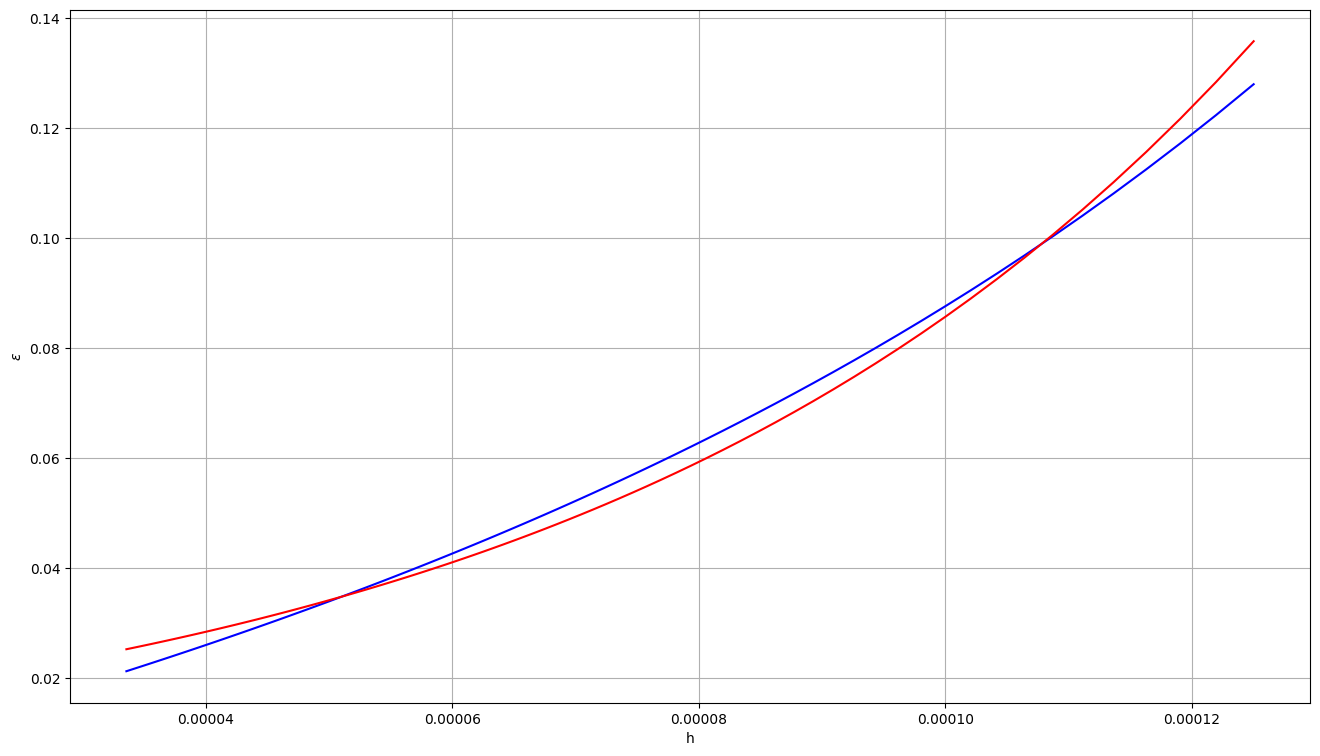

In [32]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(h, error, c = 'b')
plt.plot(h, y, c = 'r')
plt.xlabel('h')
plt.ylabel(r'$\varepsilon$')
plt.show()